<a href="https://colab.research.google.com/github/reliang/art-genre-classifier/blob/main/Art_Genre_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Painting Genres with Machine Learning
Team: Catherine Liang (419, KongYao), Yuhui Ma (419, KongYao), Wangruolan Hu (519, KongYao)

Project Mentor TA: KongYao

**The current train/test sets are saved as pickle files (module for storing python objects)! I uploaded them to our shared Google Drive. Skip Part 1-4 unless for collecting more data, changing the size of existing images, or adjusting train/test sets.**

--Catherine


Also run the line below for global/constant variables.

In [ ]:
IMG_SIZE = 80

## Part 1: Data Collection

In [ ]:
# Import torch, torchvision libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Import numpy for some computation
import numpy as np

# Import matplotlib for plotting
import matplotlib.pyplot as plt
 
device      = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Based on Bing Image Downloader: https://www.youtube.com/watch?v=solASfMs89Q

Run each of the lines below to download images into the "images" folder. Change the search word in quotes to execute different searches. Run the lines at the end to zip the image folder and save onto your own computer. On the computer, we will also need to go in and delete any unrelated images or repeats.

(For some reason, Bing Image Download isn't working well for me anymore, and keeps showing repeated images. I've switched to using Google Image Download instead. I have resources & code below this section.)

--Catherine

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("renaissance art", limit=200, output_dir='images')

In [ ]:
!zip -r /content/images.zip /content/images/

In [ ]:
from google.colab import files
files.download("/content/images.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!rm -rf images
!rm images.zip

Also, here's a possibly useful fine arts dataset I found, but only has 50 artists: https://www.kaggle.com/ikarus777/best-artworks-of-all-time.

In [ ]:
#downloader.download("abstract art painting", limit=200, output_dir='abstract')
#!zip -r /content/abstract.zip /content/abstract/

Based on Google Image Download tutorial: https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/

First complete the steps in the tutorial to download a "url.txt" file, then upload it here and run the code below to download from those urls. Make sure to make a directory on Colab images to, and input that file path in downloadImages().

--Catherine

In [ ]:
!workon cv

/bin/bash: workon: command not found


In [ ]:
!pip install requests

In [ ]:
# import the necessary packages
from imutils import paths
import argparse
import requests
import cv2
import os
from google.colab import files

def downloadImages(urls, output):
    # grab the list of URLs from the input file, then initialize the
    # total number of images downloaded thus far
    rows = open(urls).read().strip().split("\n")
    total = 0

    # loop the URLs
    for url in rows:
      try:
        # try to download the image
        r = requests.get(url, timeout=60)
        # save the image to disk
        p = os.path.sep.join([output, "{}.jpg".format(
          str(total).zfill(8))])
        print(p)
        f = open(p, "wb")
        f.write(r.content)
        f.close()
        # update the counter
        print("[INFO] downloaded: {}".format(p))
        total += 1
      # handle if any exceptions are thrown during the download process
      except:
        print("[INFO] error downloading {}...skipping".format(p))
      
      # loop over the image paths we just downloaded
    for imagePath in paths.list_images(output):
      # initialize if the image should be deleted or not
      delete = False
      # try to load the image
      try:
        image = cv2.imread(imagePath)
        # if the image is `None` then we could not properly load it
        # from disk, so delete it
        if image is None:
          delete = True
      # if OpenCV cannot load the image then the image is likely
      # corrupt so we should delete it
      except:
        print("Except")
        delete = True
      # check to see if the image should be deleted
      if delete:
        print("[INFO] deleting {}".format(imagePath))
        os.remove(imagePath)

In [ ]:
!mkdir impressionism

In [ ]:
downloadImages("urls (2).txt", "impressionism")

In [ ]:
!zip -r /content/impressionism.zip /content/impressionism

In [ ]:
from google.colab import files
files.download("/content/impressionism.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#!rm -rf images
#!rm images.zip

## Part 2: Loading & Preprocessing Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this section, I was able to read and resize the images to a common size of 80x80 pixels. The resized images are uploaded to Google Drive as a zip folder. Below are the steps I took to get there.

--Catherine

To load the images, I first uploaded the test_images.zip folder into Google Colab. Then, I ran a command to unzip the folder.

In [ ]:
!unzip test_images.zip

unzip:  cannot find or open test_images.zip, test_images.zip.zip or test_images.zip.ZIP.


Or, if using Google Drive, run the command below to unzip content. The path below is Wangruolan's:

In [ ]:
!unzip -uq "/content/drive/MyDrive/test_images.zip" -d "/content"

unzip:  cannot find or open /content/drive/MyDrive/test_images.zip, /content/drive/MyDrive/test_images.zip.zip or /content/drive/MyDrive/test_images.zip.ZIP.


The path below is Catherine's:

In [ ]:
!unzip -uq "/content/drive/MyDrive/CIS419/CIS419 519 Final Project/test_images_2.zip" -d "/content"

Test read one image from folder and put image data into an array.

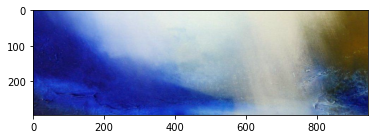

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "test_images_2"

CATEGORIES = ["abstract","fauvism", "impressionism", "pop", "renaissance_classicism", "surrealism"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path
    for img in os.listdir(path):  # iterate over each image at path
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

Test convert the image to be size 80x80.

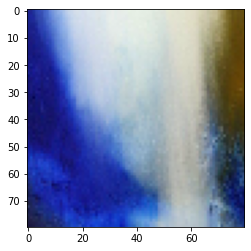

In [ ]:
# turned the variable below into a global variable at the top
#IMG_SIZE = 80 # just reduce the size to 80 and we can modify later if necessary

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

Set up folders to place resized images, and resize all images to be 220x220 pixels. At the end, zip and download the folder of resized images.

In [ ]:
!mkdir test_images_2_resized
!mkdir test_images_2_resized/abstract
!mkdir test_images_2_resized/fauvism
!mkdir test_images_2_resized/impressionism
!mkdir test_images_2_resized/pop
!mkdir test_images_2_resized/renaissance_classicism
!mkdir test_images_2_resized/surrealism

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "test_images_2"

CATEGORIES = ["abstract","fauvism", "impressionism", "pop", "renaissance_classicism", "surrealism"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path
    for img in tqdm(os.listdir(path)):  # iterate over each image at path
        filepath = os.path.join(path,img)
        if filepath.endswith(".jpg"):
            try:
                img_array = cv2.imread(filepath)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                cv2.imwrite(os.path.join('test_images_2_resized', category, img), new_array)
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))
            

100%|██████████| 649/649 [00:10<00:00, 60.24it/s]


In [ ]:
!zip -r test_images_2_resized.zip test_images_2_resized/

In [ ]:
from google.colab import files
files.download("test_images_2_resized.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Part 3: Defining training dataset

Split the data into training and validation set, where train-80% and validation-20%.

Update: this part can be skipped if we use another method (and is contained in part 4)

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('test_images_resized', output="train_val", seed=1337, ratio=(.8, .2)) 

Copying files: 1506 files [00:00, 7109.35 files/s]


## Part 4: Labeling the data

I convert the images to csv with labels besed on the name of their files. Here "abstract"-"0"; "classicism"-"1"; "fauvism"-"2"; "impressionism"-"3"; "pop"-"4"; "renaissance"-"5".

Basically, this step should before the splitting. However, the RAM is not large enough for converting all the images together. So I work on train and val data separately.

--Wangruolan

In [ ]:
import numpy as np
import pandas as pd
import os
import imageio
import glob
import pathlib
v = []
for i,files in enumerate(pathlib.Path('./train_val/train').glob('*/**/*.jpg')):
    im = imageio.imread(files.as_posix())
    value = im.flatten() # flatten in 1 dimension(row major)
    if files.parent.name == "abstract":
      label = 0
    elif files.parent.name == "classicism":
      label = 1
    elif files.parent.name == "fauvism":
      label = 2
    elif files.parent.name == "impressionism":
      label = 3
    elif files.parent.name == "pop":
      label = 4
    elif files.parent.name == "renaissance":
      label = 5
    value = np.hstack((int(label),value)) # label name is the first column
    v.append(value)
df = pd.DataFrame(v)
df = df.sample(frac=1)
df.to_csv('train.csv',header=False,index=False)

In [ ]:
import numpy as np
import pandas as pd
import os
import imageio
import glob
import pathlib
v = []
for i,files in enumerate(pathlib.Path('./train_val/val').glob('*/**/*.jpg')):
    im = imageio.imread(files.as_posix())
    value = im.flatten()
    if files.parent.name == "abstract":
      label = 0
    elif files.parent.name == "classicism":
      label = 1
    elif files.parent.name == "fauvism":
      label = 2
    elif files.parent.name == "impressionism":
      label = 3
    elif files.parent.name == "pop":
      label = 4
    elif files.parent.name == "renaissance":
      label = 5
    value = np.hstack((int(label),value))
    v.append(value)
df = pd.DataFrame(v)
df = df.sample(frac=1)
df.to_csv('val.csv',header=False,index=False)

(these csv don't have title for each column now...)

Here construct training data without csv (using the method shared by Catherine)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

training_data = []
data_resize = []

DATADIR = "test_images_2_resized"

CATEGORIES = ["abstract","fauvism", "impressionism", "pop", "renaissance_classicism", "surrealism"]

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification
        # label = ["abstract"-0, "classicism"-1, "fauvism"-2, "impressionism"-3, "pop"-4, "renaissance"-5]

        for img in tqdm(os.listdir(path)):  # iterate over each image at path
            filepath = os.path.join(path,img)
            try:
              img_array = cv2.imread(filepath)  # convert to array                
              #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
              training_data.append([img_array, class_num])  # add this to our training_data
            #except Exception as e:  # in the interest in keeping the output clean...
            #    pass
            except OSError as e:                
              print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
              print("general exception", e, os.path.join(path,img))          

create_training_data()

print(len(training_data))

100%|██████████| 649/649 [00:00<00:00, 4137.29it/s]

3518


The data need to be balanced (But I failed here.)

In [ ]:
import random

random.shuffle(training_data) # shuffle the data

In [ ]:
# test how the data mixed

for sample in training_data[:20]:
    print(sample[1])

5
2
0
3
1
0
4
2
0
2
2
2
1
3
4
5
5
1
3
0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape((-1, IMG_SIZE, IMG_SIZE,3)))

X = np.array(X).reshape((-1, IMG_SIZE, IMG_SIZE,3))

#print(np.shape(X))

# separate the data into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Save and load the data. Here X_train is the train_image, X_test is the test_image; y_train is the train_label and y_test is the test_label.

In [ ]:
import pickle

pickle_out = open("X_train_2.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test_2.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train_2.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test_2.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [ ]:
from google.colab import files
files.download("X_test_2.pickle")
files.download("X_train_2.pickle")
files.download("y_test_2.pickle")
files.download("y_train_2.pickle")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Part 5: Set Up Data for CNN

If skipping Part 1-4, run the code below to mount Google Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then navigate to the files tab on the left side and you should see a "drive" folder. Go into the folder and find the shared "CIS419/519 Final Project" folder, right click to copy the path of the folder, then store in a variable below.

Below is Mindy's path：

In [ ]:
PATH = "/content/drive/MyDrive/CIS419 519 Final Project"

Below is Catherine's path:

In [ ]:
PATH = "/content/drive/MyDrive/CIS419/CIS419 519 Final Project"

Below is Wangruolan's path:

In [ ]:
PATH = "/content/drive/MyDrive"

First, load the pickle files in.

In [ ]:
import pickle

pickle_in = open(PATH + "/X_train_2.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open(PATH + "/X_test_2.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open(PATH + "/y_train_2.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open(PATH + "/y_test_2.pickle","rb")
y_test = pickle.load(pickle_in)

## Part 6: CNN Utility

In [ ]:
import torch
import torchvision

import torch.utils.tensorboard as tb

from PIL import Image

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import random 
import os, math

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# DO NOT TOUCH THIS CELL!
def init_weights(net):
    """
    Usage: net = Model()
           net.apply(init_weights)
    """
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.ones_(m.weight)
            nn.init.zeros_(m.bias)
        elif isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
#             if m.bias is not None:
#                 stdv = 1. / math.sqrt(m.weight.size(1))
#                 nn.init.uniform_(m.bias, -stdv, stdv)


In [ ]:
# DO NOT TOUCH THIS CELL!
import torch
import torch.nn as nn
from torch.autograd import Variable

from collections import OrderedDict
import numpy as np


def summary(model, input_size, batch_size=-1, device=torch.device('cpu'), dtypes=None, verbose=True):
    result, params_info = summary_string(
        model, input_size, batch_size, device, dtypes)
    if verbose:
        print(result)

    return params_info


def summary_string(model, input_size, batch_size=-1, device=torch.device('cpu'), dtypes=None):
    if dtypes == None:
        dtypes = [torch.FloatTensor]*len(input_size)

    summary_str = ''

    def register_hook(module):
        def hook(module, input, output):
            class_name = str(module.__class__).split(".")[-1].split("'")[0]
            module_idx = len(summary)

            m_key = "%s-%i" % (class_name, module_idx + 1)
            summary[m_key] = OrderedDict()
            summary[m_key]["input_shape"] = list(input[0].size())
            summary[m_key]["input_shape"][0] = batch_size
            if isinstance(output, (list, tuple)):
                summary[m_key]["output_shape"] = [
                    [-1] + list(o.size())[1:] for o in output
                ]
            else:
                summary[m_key]["output_shape"] = list(output.size())
                summary[m_key]["output_shape"][0] = batch_size

            params = 0
            if hasattr(module, "weight") and hasattr(module.weight, "size"):
                params += torch.prod(torch.LongTensor(list(module.weight.size())))
                summary[m_key]["trainable"] = module.weight.requires_grad
            if hasattr(module, "bias") and hasattr(module.bias, "size"):
                params += torch.prod(torch.LongTensor(list(module.bias.size())))
            summary[m_key]["nb_params"] = params
            

        if (
            not isinstance(module, nn.Sequential)
            and not isinstance(module, nn.ModuleList)
        ):
            hooks.append(module.register_forward_hook(hook))

    # multiple inputs to the network
    if isinstance(input_size, tuple):
        input_size = [input_size]

    # batch_size of 2 for batchnorm
    x = [torch.rand(2, *in_size).type(dtype).to(device=device)
         for in_size, dtype in zip(input_size, dtypes)]

    # create properties
    summary = OrderedDict()
    hooks = []

    # register hook
    model.apply(register_hook)

    # make a forward pass
    model(*x)

    # remove these hooks
    for h in hooks:
        h.remove()

    summary_str += "----------------------------------------------------------------" + "\n"
    line_new = "{:>20}  {:>25} {:>15}".format(
        "Layer (type)", "Output Shape", "Param #")
    summary_str += line_new + "\n"
    summary_str += "================================================================" + "\n"
    total_params = 0
    total_output = 0
    trainable_params = 0
    total_conv2d = 0
    total_linear = 0 
    for layer in summary:
        if 'conv2d' in layer.lower():
            total_conv2d += 1
        if 'linear' in layer.lower():
            total_linear += 1 

        # input_shape, output_shape, trainable, nb_params
        line_new = "{:>20}  {:>25} {:>15}".format(
            layer,
            str(summary[layer]["output_shape"]),
            "{0:,}".format(summary[layer]["nb_params"]),
        )
        total_params += summary[layer]["nb_params"]

        total_output += np.prod(summary[layer]["output_shape"])
        if "trainable" in summary[layer]:
            if summary[layer]["trainable"] == True:
                trainable_params += summary[layer]["nb_params"]
        summary_str += line_new + "\n"

    # assume 4 bytes/number (float on cuda).
    total_input_size = abs(np.prod(sum(input_size, ()))
                           * batch_size * 4. / (1024 ** 2.))
    total_output_size = abs(2. * total_output * 4. /
                            (1024 ** 2.))  # x2 for gradients
    total_params_size = abs(total_params * 4. / (1024 ** 2.))
    total_size = total_params_size + total_output_size + total_input_size

    summary_str += "================================================================" + "\n"
    summary_str += "Total Conv2d layers: {0:,}".format(total_conv2d) + "\n"
    summary_str += "Total Linear layers: {0:,}".format(total_linear) + "\n"
    summary_str += "Total params: {0:,}".format(total_params) + "\n"
    summary_str += "Trainable params: {0:,}".format(trainable_params) + "\n"
    summary_str += "Non-trainable params: {0:,}".format(total_params -
                                                        trainable_params) + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    summary_str += "Input size (MB): %0.2f" % total_input_size + "\n"
    summary_str += "Forward/backward pass size (MB): %0.2f" % total_output_size + "\n"
    summary_str += "Params size (MB): %0.2f" % total_params_size + "\n"
    summary_str += "Estimated Total Size (MB): %0.2f" % total_size + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    # return summary
    return summary_str, {'total_params': total_params, 
                         'total_trainable_params': trainable_params,
                         'total_conv2d': total_conv2d,
                         'total_linear': total_linear}

In [ ]:
# DO NOT TOUCH THIS CELL
from torch import save
from torch import load
from os import path

def check_model_exist_by_name(model_name):
    if os.path.exists(model_name + ".pth") and os.path.isfile(model_name + ".pth"):
        print(f"[Successly trained and saved!] Your model named {model_name}.pth has been saved! DO NOT change the file's name! Just include it in your submission files.")
    else:
        print(f"[Successly trained but failed to save!] Your model named {model_name}.pth has not been saved or saved in a diffrent name from what we expect!")
        import glob
        pt_files = glob.glob("*.pth")
        if pt_files:
            print(f"---> Somehow you've saved models as, {pt_files} which is not what autograder expects!")
            print(f"---> We expect that the trained model to be saved exactly as {model_name}.pth")
            print(f"---> What you can do is to manually rename the trained model to be {model_name}.pth")
        else:
            print(f"---> We found no saved models in *.pth format at all! Manually check if your saved the models in other formats or they are not saved at all!")


def save_model(model, name):
    return save(model.state_dict(), name + ".pth")
    

def load_model(name, device_name='cpu'):
    """
    @Brief: load a model saved in the ".pth" or ".pt" formats
    @Inputs:
        name (str): name of the model (without the extension)
        device_name (str): name of the device i.e: 'cpu', 'cuda:0', that you would want to run the model on.
    @Outputs:
        r (nn.Module): a Pytorch model of either "BasicCNNClassifier" or "MyBestCNNClassifier" (depend on "name" input) 
            with pretrained wieghts.
    """
    if "." in name:
        name = name.split('.')[0]
        
    if name == "BasicCNNClassifier":
        r = BasicCNNClassifier()
    elif name == "MyBestCNNClassifier":
        r = MyBestCNNClassifier()
    elif name == "VGG":
        r = VGG.pth
    else:
       r = Resnet.pth
        
    r.load_state_dict(load(name + ".pth", map_location=device_name))
    return r

In [ ]:
# DO NOT TOUCH THIS CELL!
import numpy as np
from torchvision.transforms import functional as TF

def accuracy(outputs, labels):
    outputs_idx = outputs.max(1)[1].type_as(labels)
    return outputs_idx.eq(labels).float().mean()

def predict(model, inputs, device='cpu'):
    inputs = inputs.to(device)
    logits = model(inputs)
    return F.softmax(logits, -1)

def draw_bar(axis, preds, labels=None):
    y_pos = np.arange(6)
    axis.barh(y_pos, preds, align='center', alpha=0.5)
    axis.set_xticks(np.linspace(0, 1, 10))
    
    if labels:
        axis.set_yticks(y_pos)
        axis.set_yticklabels(labels)
    else:
        axis.get_yaxis().set_visible(False)
    
    axis.get_xaxis().set_visible(False)

def visualize_predictions(model=None, model_name=None, device_name='cpu'):
  
    if model is not None:
        model.eval()
    else:
        model = load_model(model_name, device_name)
    
    # Get the device 
    if device_name is not None:
        device = torch.device(device_name)
    model = model.to(device)

    validation_image_path='./data/valid' #enter the path 

    dataset = ArtDataset(X_train, y_train)

    f, axes = plt.subplots(2, 6)

    idxes = np.random.randint(0, len(dataset), size=6)

    for i, idx in enumerate(idxes):
        img, label = dataset[idx]
        preds = predict(model, img[None], device=device).detach().cpu().numpy()

        axes[0, i].imshow(TF.to_pil_image(img))
        axes[0, i].axis('off')
        draw_bar(axes[1, i], preds[0], LABEL_ if i == 0 else None)

    plt.show()

In [ ]:
# Utility Function
def load_data(X, y, data_transforms=None, num_workers=0, batch_size=128):
    dataset = ArtDataset(X, y,data_transforms)
    return DataLoader(dataset, num_workers=num_workers, batch_size=batch_size, shuffle=True)

## Part 7: CNN Training & Testing

Currently I put in the most basic CNN model from our hw. Also had to adapt our orignal SuperTuxDataset object to this project. It is now called "ArtDataset," and it takes in X and y (which can be X_train & y_train, or X_test & y_test).

I had to adjust the batch size to be pretty small--32 (originally had it at 128 for the hw) since we have a small dataset. Logging Intervals and saving intervals are also adjusted to be small. Accuracy with most basic model is around 0.3.

To change the classifier, please make a new one rather than editing BasicCNNClassifier so we can compare different classifiers!

--Catherine

In [ ]:
class ClassificationLoss(torch.nn.Module):
    def forward(self, input, target):
        """
        Compute mean(-log(softmax(input)_label))
        @input:  torch.Tensor((B,C)), where B = batch size, C = number of classes
        @target: torch.Tensor((B,), dtype=torch.int64)
        @return:  torch.Tensor((,))
        Hint: use torch.nn.functional.nll_loss and torch.nn.functional.log_softmax
        More details: https://pytorch.org/docs/master/nn.functional.html#torch.nn.functional.nll_loss).
        """
        return torch.nn.functional.nll_loss(torch.nn.functional.log_softmax(input, 1), target, reduction='mean')

In [ ]:
import pandas as pd 
import os 
from skimage import io 
import csv

class ArtDataset(Dataset):
    def __init__(self, X, y, data_transforms=None):
        self.X = X
        self.y = y
        
    transform = transforms.ToTensor()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        """
        return a tuple: img, label
        """
        return self.transform(self.X[idx]), self.y[idx]

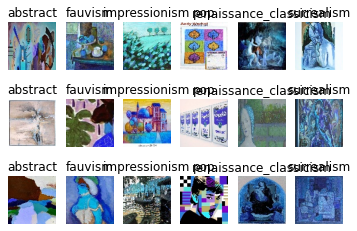

In [ ]:
LABEL_NAMES = {"abstract": 0, "fauvism": 1, "impressionism": 2, "pop": 3, "renaissance_classicism": 4, "surrealism": 5}
LABEL_ = ["abstract","fauvism", "impressionism", "pop", "renaissance_classicism", "surrealism"]

def visualize_data():
    
    dataset = ArtDataset(X_train, y_train)

    f, axes = plt.subplots(3, len(LABEL_NAMES))

    counts = [0]*len(LABEL_NAMES)

    for img, label in dataset:
        c = counts[label]

        if c < 3:
            ax = axes[c][label]
            ax.imshow(img.permute(1, 2, 0).numpy())
            ax.axis('off')
            ax.set_title(LABEL_[label])
            counts[label] += 1
        
        if sum(counts) >= 3 * len(LABEL_NAMES):
            break

    plt.show()

visualize_data()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class BasicCNNClassifier(torch.nn.Module):
    def __init__(self):
        # Don't remove the following line. Otherwise, it would raise ```AttributeError: cannot assign module before Module.__init__() call``` exception ERROR!
        super(BasicCNNClassifier, self).__init__() 
        
        self.conv1 = nn.Conv2d(3, 8, 4, 2)
        self.conv2 = nn.Conv2d(8, 16, 4, 2)
        self.fc1 = nn.Linear(5184, 128)
        self.fc2 = nn.Linear(128, 6)
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 5184)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
student_net = BasicCNNClassifier()

# Investigate your network's layers
# Compare the printed shape with what expected in the specification
print("\n========= Model summarization ============ ") 
student_net_info = summary(student_net, (3, 80, 80), device='cpu')


========= Model summarization ============ 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 39, 39]             392
            Conv2d-2           [-1, 16, 18, 18]           2,064
            Linear-3                  [-1, 128]         663,680
            Linear-4                    [-1, 6]             774
BasicCNNClassifier-5                    [-1, 6]               0
Total Conv2d layers: 2
Total Linear layers: 2
Total params: 666,910
Trainable params: 666,910
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.07
Forward/backward pass size (MB): 0.13
Params size (MB): 2.54
Estimated Total Size (MB): 2.75
----------------------------------------------------------------



Currently the batch size is really small

In [ ]:
class Args(object):
    def __init__(self):
      self.log_dir = 'logdir'
      self.learning_rate = 2E-4
      self.batch_size = 128
      self.optimizer = 'adam' #

args = Args();

In [ ]:
def train(args, model_name="BasicCNNClassifier"):
    """
    @Brief: training your model. This should include the following items:
        - Initialize the model (already given). Only need to map the model to the device on which you would want to run the model on 
                using the following syntax: 
                model = model.to(device) 
                where device = torch.device(<device_name>), 
                i.e: device = torch.device("cuda:0") or device = torech.device("cpu")
                    
        - Initialize tensorboard summarizers (already given)
        - Initialize data loaders (you need to code up)
        - Initialize the optimizer (you need to code up. Type is of your choice)
        - Initialize the loss function (you should have coded up above)
        - A for loop to iterate through many epochs (up to your choice). In each epoch:
                - Iterate through every mini-batches (remember to map data and labels to the device that you would want to run the model on)
                        - Run the forward path
                        - Get loss
                        - Calculate gradients 
                        - Update the model's parameters
                - Evaluate your model on the validation set
                - Save the model if the performance on the validation set is better using exactly the following line:
                        save_model(model, model_name) 
                 
    @Inputs: 
        Args: object of your choice to carry arguments that you want to use within your training function. 
    @Output: 
        No return is necessary here. 
    """
    # Do not touch the following lines
    # Initialize the model 
    if model_name == "MyBestCNNClassifier":
        model = MyBestCNNClassifier()
    else:
        model = BasicCNNClassifier()
    # Initialize tensorboard loggers
    if args.log_dir is not None:
        train_logger = tb.SummaryWriter(os.path.join(args.log_dir, 'train'))
        valid_logger = tb.SummaryWriter(os.path.join(args.log_dir, 'valid'))
    
    # Create subfolders to save the tensorboard log files
    if not os.path.exists(os.path.join(args.log_dir, f'train/{model_name}')):
        os.makedirs(os.path.join(args.log_dir, f'train/{model_name}'))
    if not os.path.exists(os.path.join(args.log_dir, f'valid/{model_name}')):
        os.makedirs(os.path.join(args.log_dir, f'valid/{model_name}'))  
    #----------------------------------------
    
    device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.apply(init_weights)
    
    train_loader = load_data(X_train, y_train, data_transforms=None, num_workers=0, batch_size=args.batch_size)
    test_loader = load_data(X_test, y_test, data_transforms=None, num_workers=0, batch_size=args.batch_size)
    
    if args.optimizer == 'adam': 
      optimizer = torch.optim.Adam(model.parameters(),lr = args.learning_rate)
    else: 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
    
    criterion = ClassificationLoss()
    running_loss = 0.0
    counter = 0
    def check_accuracy():
      correct = 0
      total = 0
      with torch.no_grad():
          for data in test_loader:
              images, labels = data[0].to(device), data[1].to(device)
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      acc = correct / total
      print('accuracy: %.3f' %(acc))
      return acc
    best_acc = 0

    loss_curve = []
    epoch_loss_mid = 0
    run_loss = []
    num_epochs = 50

    for epoch in range(num_epochs):
      for i,(inputs,labels) in enumerate(train_loader):
        counter += 1
        optimizer.zero_grad()

        # Forward propogation happens here
        inputs = inputs.to(device)
        outputs = model(inputs) 

        labels = labels.to(device)
        loss = criterion(outputs,labels)  
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (counter+1) % 10 == 0: 
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 1000))

            epoch_loss_mid += running_loss / 1000
            run_loss.append(running_loss)

            running_loss = 0.0
        if (counter+1) % 20 == 0:
          acc = check_accuracy()
          if acc > best_acc:
            save_model(model, model_name)
    
      L = len(run_loss)
      if L != 0:
        loss_curve.append(epoch_loss_mid / L)
      epoch_loss_mid = 0
      run_loss = []

    acc = check_accuracy()
    if acc > best_acc:
      save_model(model, model_name)

    epochs = np.arange(num_epochs)    
    plt.figure(figsize=(5,5))
    plt.plot(epochs,loss_curve)
    plt.title("Loss vs num Epochs")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    # Don't touch the following lines
    #You are not returning a model, but rather saving it to a file, which you will upload along with the homework4.py file
    save_model(model, model_name) 
    # Make sure the file has been saved 
    assert os.path.exists(model_name + ".pth") and os.path.isfile(model_name + ".pth"), f"[Fail to save your model named {model_name}.pth!"

[1,     9] loss: 0.016
[1,    19] loss: 0.018
accuracy: 0.250
[1,    29] loss: 0.017
[1,    39] loss: 0.017
accuracy: 0.241
[2,     5] loss: 0.016
[2,    15] loss: 0.016
accuracy: 0.283
[2,    25] loss: 0.016
[2,    35] loss: 0.016
accuracy: 0.325
[3,     1] loss: 0.015
[3,    11] loss: 0.015
accuracy: 0.335
[3,    21] loss: 0.015
[3,    31] loss: 0.014
accuracy: 0.384
[3,    41] loss: 0.015
[4,     7] loss: 0.014
accuracy: 0.364
[4,    17] loss: 0.013
[4,    27] loss: 0.013
accuracy: 0.388
[4,    37] loss: 0.014
[5,     3] loss: 0.013
accuracy: 0.405
[5,    13] loss: 0.013
[5,    23] loss: 0.013
accuracy: 0.429
[5,    33] loss: 0.012
[5,    43] loss: 0.012
accuracy: 0.445
[6,     9] loss: 0.011
[6,    19] loss: 0.012
accuracy: 0.457
[6,    29] loss: 0.011
[6,    39] loss: 0.011
accuracy: 0.473
[7,     5] loss: 0.011
[7,    15] loss: 0.010
accuracy: 0.453
[7,    25] loss: 0.010
[7,    35] loss: 0.010
accuracy: 0.466
[8,     1] loss: 0.010
[8,    11] loss: 0.009
accuracy: 0.418
[8,    2

No handles with labels found to put in legend.


accuracy: 0.436


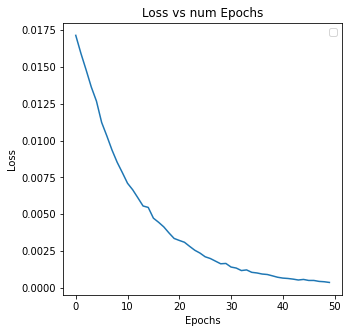

[Successly trained and saved!] Your model named BasicCNNClassifier.pth has been saved! DO NOT change the file's name! Just include it in your submission files.


In [ ]:
model_name="BasicCNNClassifier"
train(args, model_name=model_name)

# Make sure that the model you've trained above has already been saved! 
check_model_exist_by_name(model_name)

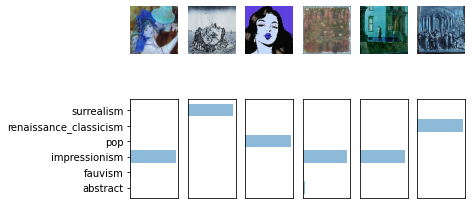

In [ ]:
# Visualize the prediction of your BasicCNNClassifier model
model_name = "BasicCNNClassifier"
visualize_predictions(model_name=model_name)

4. Best CNN Model

In [ ]:
MAX_Conv2d = 15
MAX_Linear = 4
MAX_PARAMS = 2e6 

import torch
import torch.nn as nn
import torch.nn.functional as F
class MyBestCNNClassifier(torch.nn.Module):
    def __init__(self):
        """
        Task: code up your model
        """
        # Don't remove the following line. Otherwise, it would raise ```AttributeError: cannot assign module before Module.__init__() call``` exception ERROR!
        super(MyBestCNNClassifier, self).__init__() 
        # YOUR CODE HERE 
        super(MyBestCNNClassifier, self).__init__() 
        self.conv_1 = torch.nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5, stride=1, padding=2)
        self.conv_2 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, stride=2, padding=1)
        self.conv_4 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv_5 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv_6 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=2, padding=1)
        self.conv_7 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_8 = torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_9 = torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=2, padding=1)
        self.linear_1 = torch.nn.Linear(3200, 128)
        self.linear_2 = torch.nn.Linear(128, 6)
        self.relu = torch.nn.ReLU()
        self.dropout = nn.Dropout(0.15)

    def forward(self, x):
        """
        Your code here
        @Brief: This function takes as input a tensor x of size Bx3x64x64 
        and outputs a "logit" tensor of size Bx6. Do not include a softmax layer 
        here because most of Pytorch's loss functions take "logit" as one of the inputs
        while integrating log() with softmax() into a log_softmax() function.    
        @Inputs: 
          x: torch.Tensor((B,3,64,64)) 
        @return: torch.Tensor((B,6))
       
        """
        # YOUR CODE HERE 
        x = self.relu(self.conv_1(x))
        x = self.relu(self.conv_2(x))
        x = self.relu(self.conv_3(x))
        x = self.relu(self.conv_4(x))
        x = self.relu(self.conv_5(x))
        x = self.relu(self.conv_6(x))  
        x = self.relu(self.conv_7(x))
        x = self.relu(self.conv_8(x))
        x = self.relu(self.conv_9(x))      
        x = x.reshape(x.size(0), -1) # Flatten the image from [16, 16, 28, 28] to [16, 16*28*28] 
        x = self.dropout(x)
        x = self.relu(self.linear_1(x))
        x = self.dropout(x)
        x = self.linear_2(x)
        return x


In [ ]:
student_net = MyBestCNNClassifier()

# Investigate your network's layers
# Compare the printed shape with what expected in the specification
print("\n========= Model summarization ============ ") 
student_net_info = summary(student_net, (3, 80, 80), device='cpu')


========= Model summarization ============ 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 80, 80]             608
              ReLU-2            [-1, 8, 80, 80]               0
            Conv2d-3            [-1, 8, 80, 80]             584
              ReLU-4            [-1, 8, 80, 80]               0
            Conv2d-5            [-1, 8, 40, 40]             584
              ReLU-6            [-1, 8, 40, 40]               0
            Conv2d-7           [-1, 16, 40, 40]           1,168
              ReLU-8           [-1, 16, 40, 40]               0
            Conv2d-9           [-1, 16, 40, 40]           2,320
             ReLU-10           [-1, 16, 40, 40]               0
           Conv2d-11           [-1, 16, 20, 20]           2,320
             ReLU-12           [-1, 16, 20, 20]               0
           Conv2d-13           [-1, 32, 20, 20]           

[1,     9] loss: 0.017
[1,    19] loss: 0.018
accuracy: 0.220
[1,    29] loss: 0.017
[1,    39] loss: 0.017
accuracy: 0.247
[2,     5] loss: 0.017
[2,    15] loss: 0.016
accuracy: 0.401
[2,    25] loss: 0.016
[2,    35] loss: 0.015
accuracy: 0.392
[3,     1] loss: 0.015
[3,    11] loss: 0.014
accuracy: 0.399
[3,    21] loss: 0.014
[3,    31] loss: 0.014
accuracy: 0.402
[3,    41] loss: 0.014
[4,     7] loss: 0.014
accuracy: 0.369
[4,    17] loss: 0.013
[4,    27] loss: 0.013
accuracy: 0.456
[4,    37] loss: 0.014
[5,     3] loss: 0.013
accuracy: 0.426
[5,    13] loss: 0.013
[5,    23] loss: 0.012
accuracy: 0.474
[5,    33] loss: 0.012
[5,    43] loss: 0.013
accuracy: 0.442
[6,     9] loss: 0.012
[6,    19] loss: 0.012
accuracy: 0.455
[6,    29] loss: 0.012
[6,    39] loss: 0.013
accuracy: 0.447
[7,     5] loss: 0.012
[7,    15] loss: 0.012
accuracy: 0.482
[7,    25] loss: 0.012
[7,    35] loss: 0.012
accuracy: 0.433
[8,     1] loss: 0.011
[8,    11] loss: 0.011
accuracy: 0.479
[8,    2

No handles with labels found to put in legend.


accuracy: 0.464
accuracy: 0.463


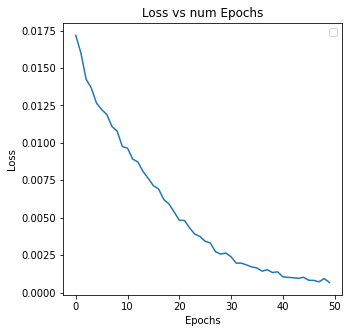

In [ ]:
model_name="MyBestCNNClassifier"
train(args, model_name=model_name)


In [ ]:
def trainTorchModel(args, model_name="VGG"):
    """
    @Brief: training your model. This should include the following items:
        - Initialize the model (already given). Only need to map the model to the device on which you would want to run the model on 
                using the following syntax: 
                model = model.to(device) 
                where device = torch.device(<device_name>), 
                i.e: device = torch.device("cuda:0") or device = torech.device("cpu")
                    
        - Initialize tensorboard summarizers (already given)
        - Initialize data loaders (you need to code up)
        - Initialize the optimizer (you need to code up. Type is of your choice)
        - Initialize the loss function (you should have coded up above)
        - A for loop to iterate through many epochs (up to your choice). In each epoch:
                - Iterate through every mini-batches (remember to map data and labels to the device that you would want to run the model on)
                        - Run the forward path
                        - Get loss
                        - Calculate gradients 
                        - Update the model's parameters
                - Evaluate your model on the validation set
                - Save the model if the performance on the validation set is better using exactly the following line:
                        save_model(model, model_name) 
                 
    @Inputs: 
        Args: object of your choice to carry arguments that you want to use within your training function. 
    @Output: 
        No return is necessary here. 
    """
    # Do not touch the following lines
    # Initialize tensorboard loggers
    if args.log_dir is not None:
        train_logger = tb.SummaryWriter(os.path.join(args.log_dir, 'train'))
        valid_logger = tb.SummaryWriter(os.path.join(args.log_dir, 'valid'))
    
    # Create subfolders to save the tensorboard log files
    if not os.path.exists(os.path.join(args.log_dir, f'train/{model_name}')):
        os.makedirs(os.path.join(args.log_dir, f'train/{model_name}'))
    if not os.path.exists(os.path.join(args.log_dir, f'valid/{model_name}')):
        os.makedirs(os.path.join(args.log_dir, f'valid/{model_name}'))  
    #----------------------------------------
    
    # YOUR CODE HERE
    device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Initialize the model 
    if model_name == "VGG":
        model = torchvision.models.vgg16(pretrained=False).to(device)
    model.apply(init_weights)
    
    train_loader = load_data(X_train, y_train, data_transforms=None, num_workers=0, batch_size=args.batch_size)
    test_loader = load_data(X_test, y_test, data_transforms=None, num_workers=0, batch_size=args.batch_size)
    
    if args.optimizer == 'adam': 
      optimizer = torch.optim.Adam(model.parameters(),lr = args.learning_rate)
    else: 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
    
    criterion = ClassificationLoss()
    running_loss = 0.0
    counter = 0
    def check_accuracy():
      correct = 0
      total = 0
      with torch.no_grad():
          for data in test_loader:
              images, labels = data[0].to(device), data[1].to(device)
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      acc = correct / total
      print('accuracy: %.3f' %(acc))
      return acc
    best_acc = 0

    loss_curve = []
    epoch_loss_mid = 0
    run_loss = []
    num_epochs = 30

    for epoch in range(num_epochs):
      for i,(inputs,labels) in enumerate(train_loader):
        counter += 1
        optimizer.zero_grad()

        # Forward propogation happens here
        inputs = inputs.to(device)
        outputs = model(inputs) 

        labels = labels.to(device)
        loss = criterion(outputs,labels)  
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (counter+1) % 10 == 0: 
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 1000))

            epoch_loss_mid += running_loss / 1000
            run_loss.append(running_loss)

            running_loss = 0.0

      L = len(run_loss)
      loss_curve.append(epoch_loss_mid / L)
      epoch_loss_mid = 0
      run_loss = []

      if (counter+1) % 20 == 0:
          acc = check_accuracy()
          if acc > best_acc:
            save_model(model, model_name)
      acc = check_accuracy()
    
    if acc > best_acc:
      save_model(model, model_name)


    epochs = np.arange(num_epochs)    
    plt.figure(figsize=(5,5))
    plt.plot(epochs,loss_curve)
    plt.title("Loss vs num Epochs")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()


    # Don't touch the following lines
    #You are not returning a model, but rather saving it to a file, which you will upload along with the homework4.py file
    save_model(model, model_name) 
    # Make sure the file has been saved 
    assert os.path.exists(model_name + ".pth") and os.path.isfile(model_name + ".pth"), f"[Fail to save your model named {model_name}.pth!"

[1,     9] loss: 0.031
[1,    19] loss: 0.020
accuracy: 0.156
[2,     7] loss: 0.019
[2,    17] loss: 0.019
accuracy: 0.261
[3,     5] loss: 0.018
[3,    15] loss: 0.017
accuracy: 0.312
[4,     3] loss: 0.017
[4,    13] loss: 0.016
accuracy: 0.358
[5,     1] loss: 0.016
[5,    11] loss: 0.015
[5,    21] loss: 0.015
accuracy: 0.345
[6,     9] loss: 0.015
[6,    19] loss: 0.014
accuracy: 0.445
[7,     7] loss: 0.013
[7,    17] loss: 0.013
accuracy: 0.422
[8,     5] loss: 0.014
[8,    15] loss: 0.013
accuracy: 0.477
[9,     3] loss: 0.012
[9,    13] loss: 0.013
accuracy: 0.456
[10,     1] loss: 0.013
[10,    11] loss: 0.013
[10,    21] loss: 0.012
accuracy: 0.456
[11,     9] loss: 0.012
[11,    19] loss: 0.011
accuracy: 0.530
[12,     7] loss: 0.011
[12,    17] loss: 0.011
accuracy: 0.503
[13,     5] loss: 0.011
[13,    15] loss: 0.011
accuracy: 0.516
[14,     3] loss: 0.010
[14,    13] loss: 0.010
accuracy: 0.493
[15,     1] loss: 0.009
[15,    11] loss: 0.009
[15,    21] loss: 0.009
acc

No handles with labels found to put in legend.


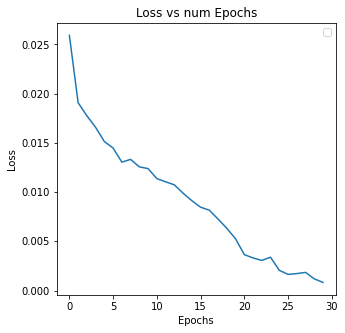

In [ ]:
trainTorchModel(args, "VGG")

In [ ]:
def trainTorchModel(args, model_name="Resnet"):
    # Do not touch the following lines
    # Initialize tensorboard loggers
    if args.log_dir is not None:
        train_logger = tb.SummaryWriter(os.path.join(args.log_dir, 'train'))
        valid_logger = tb.SummaryWriter(os.path.join(args.log_dir, 'valid'))
    
    # Create subfolders to save the tensorboard log files
    if not os.path.exists(os.path.join(args.log_dir, f'train/{model_name}')):
        os.makedirs(os.path.join(args.log_dir, f'train/{model_name}'))
    if not os.path.exists(os.path.join(args.log_dir, f'valid/{model_name}')):
        os.makedirs(os.path.join(args.log_dir, f'valid/{model_name}'))  
    #----------------------------------------
    
    device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Initialize the model 
    if model_name == "Resnet":
        model = torchvision.models.resnet18(pretrained=True).to(device)
    model.apply(init_weights)
    
    train_loader = load_data(X_train, y_train, data_transforms=None, num_workers=0, batch_size=args.batch_size)
    test_loader = load_data(X_test, y_test, data_transforms=None, num_workers=0, batch_size=args.batch_size)
    
    if args.optimizer == 'adam': 
      optimizer = torch.optim.Adam(model.parameters(),lr = args.learning_rate)
    else: 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
    
    criterion = ClassificationLoss()
    running_loss = 0.0
    counter = 0
    def check_accuracy():
      correct = 0
      total = 0
      with torch.no_grad():
          for data in test_loader:
              images, labels = data[0].to(device), data[1].to(device)
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      acc = correct / total
      print('accuracy: %.3f' %(acc))
      return acc
    best_acc = 0

    loss_curve = []
    epoch_loss_mid = 0
    run_loss = []
    num_epochs = 15

    for epoch in range(num_epochs):
      for i,(inputs,labels) in enumerate(train_loader):
        counter += 1
        optimizer.zero_grad()

        # Forward propogation happens here
        inputs = inputs.to(device)
        outputs = model(inputs) 

        labels = labels.to(device)
        loss = criterion(outputs,labels)  
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (counter+1) % 10 == 0: 
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 1000))

            epoch_loss_mid += running_loss / 1000
            run_loss.append(running_loss)

            running_loss = 0.0

      L = len(run_loss)
      loss_curve.append(epoch_loss_mid / L)
      epoch_loss_mid = 0
      run_loss = []

      acc = check_accuracy()


    epochs = np.arange(num_epochs)    
    plt.figure(figsize=(5,5))
    plt.plot(epochs,loss_curve)
    plt.title("Loss vs num Epochs")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    # Don't touch the following lines
    #You are not returning a model, but rather saving it to a file, which you will upload along with the homework4.py file
    #save_model(model, model_name) 
    # Make sure the file has been saved 
    #assert os.path.exists(model_name + ".pth") and os.path.isfile(model_name + ".pth"), f"[Fail to save your model named {model_name}.pth!"

[1,     9] loss: 0.040
[1,    19] loss: 0.026
[1,    29] loss: 0.017
[1,    39] loss: 0.014
accuracy: 0.513
[2,     5] loss: 0.012
[2,    15] loss: 0.009
[2,    25] loss: 0.009
[2,    35] loss: 0.008
accuracy: 0.533
[3,     1] loss: 0.008
[3,    11] loss: 0.003
[3,    21] loss: 0.003
[3,    31] loss: 0.003
[3,    41] loss: 0.003
accuracy: 0.482
[4,     7] loss: 0.002
[4,    17] loss: 0.001
[4,    27] loss: 0.001
[4,    37] loss: 0.001
accuracy: 0.520
[5,     3] loss: 0.001
[5,    13] loss: 0.001
[5,    23] loss: 0.001
[5,    33] loss: 0.001
[5,    43] loss: 0.001
accuracy: 0.510
[6,     9] loss: 0.000
[6,    19] loss: 0.000
[6,    29] loss: 0.000
[6,    39] loss: 0.000
accuracy: 0.513
[7,     5] loss: 0.001
[7,    15] loss: 0.000
[7,    25] loss: 0.000
[7,    35] loss: 0.000
accuracy: 0.514
[8,     1] loss: 0.000
[8,    11] loss: 0.000
[8,    21] loss: 0.000
[8,    31] loss: 0.000
[8,    41] loss: 0.000
accuracy: 0.533
[9,     7] loss: 0.000
[9,    17] loss: 0.000
[9,    27] loss: 0.00

No handles with labels found to put in legend.


accuracy: 0.506


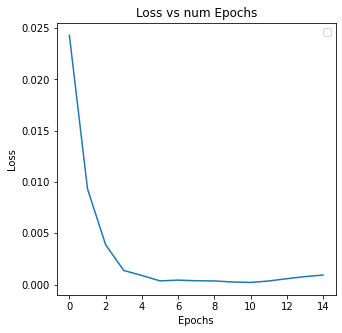

In [ ]:
trainTorchModel(args, "Resnet")

Compare accuracy between different genres.

In [ ]:
# function to plot confusion matrix
# From https://medium.com/@vikashrajluhaniwal, author: Vikashraj Luhaniwal
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [ ]:
def accuracy_labels(preds, labels):
    return np.sum(preds == labels)/len(preds)

def get_model_accuracy(model_name, device_name='cpu'):
    """
    @Brief: evaluate the model's accuracy on the test set. In this function, instead of using the model that is already  
            available in the current running session, we attempt to retrieve it using a Pytorch function called 
            torch.load(...). 
            This step is gonna be executed with device_name='cpu' to evaluate your code's submission on gradescope so if it fails here, your submission would likely fail.
    @Inputs: 
        model_name (str): name of the model (without its exitension)
        device_name (str): name of the device on which the model is run i.e: 'cpu', 'cuda:0' ...
    """

    if "." in model_name:
        model_name = model_name.split(".")[0]
        
    data = load_data(X_test, y_test)
    
    device = torch.device(device_name)
    
    model = load_model(model_name, device_name)
    model = model.to(device)

    batch_size = 32
    preds = []
    labels = []
    for (X, Y) in data:
        X = X.to(device)
        Y = Y.to(device)
        y_pred = torch.argmax(model(X), dim = 1).tolist()
        y_pred = map(int, y_pred)
        preds.extend(list(y_pred))
        labels.extend(Y.tolist())

    cm = confusion_matrix(np.array(labels), np.array(preds))
    plot_confusion_matrix(cm, np.unique(np.array(preds)))
    
    return accuracy_labels(np.array(preds), np.array(labels))  
